# Loan Prediction

In [1]:
# importing data

import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\AnalyticsVidhya\train_loan.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#printing all columns
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#describe
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#checking missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#imputing values

for i in data.columns:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0] , inplace = True)
    else:
        data[i].fillna(data[i].mean() , inplace= True)

In [7]:
#checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Figure size 1008x432 with 0 Axes>

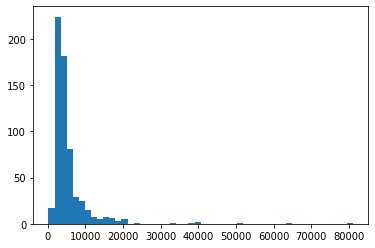

<Figure size 1008x432 with 0 Axes>

In [8]:
#checking the status of Applicant Income
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data['ApplicantIncome'] , bins = 50)
plt.figure(figsize=[14,6])

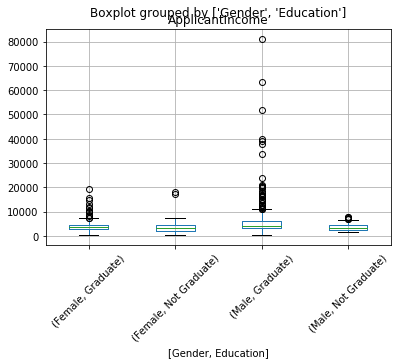

In [9]:
#boxplot

data.boxplot('ApplicantIncome' , by = ['Gender' , 'Education' ] , rot=45)

In [10]:
# The outliers observed must be the varying levels in income due to disparity in society
#The educated ones seem to earn maximums more than the uneducated ones
#Graduate female earns more than the Ungraduated Male

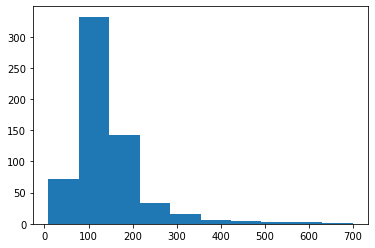

In [11]:
#insoecing the loan amount

plt.hist(data['LoanAmount'] , bins=10)
plt.show();

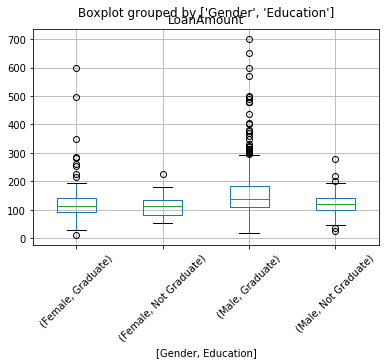

In [12]:
#outlier

data.boxplot('LoanAmount' , by = ['Gender' , 'Education'] , rot=45)

# Categorical Variable Analysis

In [13]:
a = data['Credit_History'].value_counts(ascending=True)

b = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
b

,Loan_Status
Credit_History,
0.000000,0.078652
0.842199,0.740000
1.000000,0.795789


Text(0, 0.5, 'Probability of getting loan')

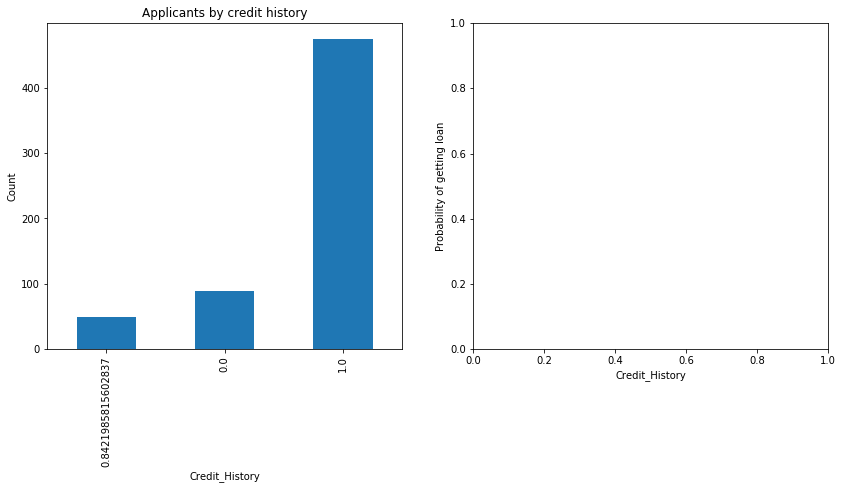

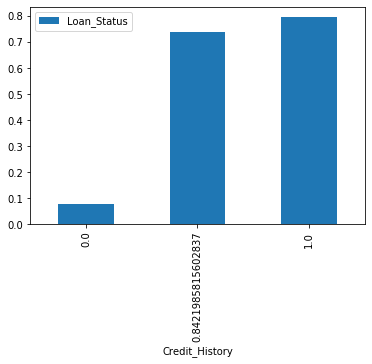

In [14]:
#subplotting

fig = plt.figure(figsize=[14,6])

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count')
ax1.set_title('Applicants by credit history')

a.plot(kind = 'bar')
b.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')



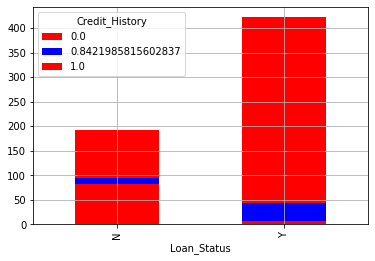

In [15]:
# using crosstab

c = pd.crosstab(data['Loan_Status'] , data['Credit_History'])
c.plot(kind='bar' , stacked=True , color = ['red' , 'blue'] , grid=True)

In [16]:
c = data['Property_Area'].value_counts()

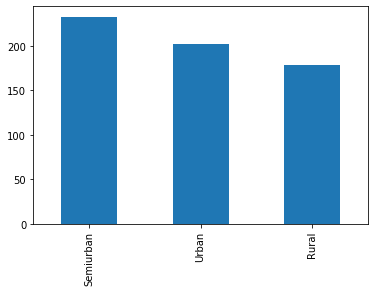

In [17]:
data['Property_Area'].value_counts().plot(kind='bar')

In [18]:
#Since all data in Loan Amount cannot be really just ignored , have to normalize it 

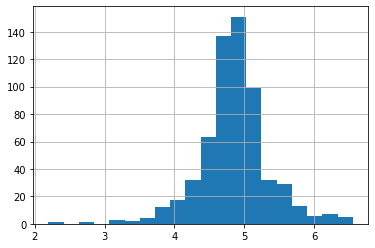

In [19]:
data['LoanAmount'] = np.log(data['LoanAmount'])
data['LoanAmount'].hist(bins=20)

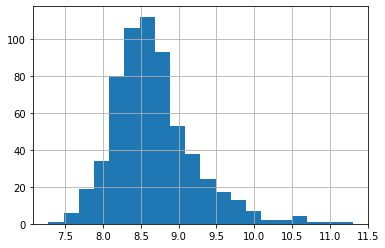

In [20]:
#Now even the Applicants income could be supplemented by CoApplicants income

data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

#normalizing
data['TotalIncome'] = np.log(data['TotalIncome'])

data['TotalIncome'].hist(bins=20)

In [21]:
# Label encoding the variables

categorical = []
for x in data.columns:
    if data[x].dtype == 'object':
        categorical.append(x)
        
        
categorical.remove(categorical[0])

print(categorical)

from sklearn.preprocessing import LabelEncoder

#instantiating 
le = LabelEncoder()

for i in categorical:
    data[i] = le.fit_transform(data[i])
    
    


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1,8.699515


# Making train and test dataset

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#dropping
data.drop(['ApplicantIncome' , 'CoapplicantIncome'] , axis=1 , inplace=True)

for i , j in enumerate(data.columns):
    print( i ,j)

#swapping columns
col_list = list(data)
col_list[10] , col_list[11] = col_list[11] , col_list[10]
data.columns = col_list

#printing names
print(list(data))

#assigning values

X = data.loc[: , ['Gender', 'Married', 'Dependents', 'Education', 
                  'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome']].values
y = data.loc[ : , 'Loan_Status'].values

#converting dtype



0 Loan_ID
1 Gender
2 Married
3 Dependents
4 Education
5 Self_Employed
6 LoanAmount
7 Loan_Amount_Term
8 Credit_History
9 Property_Area
10 Loan_Status
11 TotalIncome
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome', 'Loan_Status']


In [24]:
#converting dtypes for logistic regression

X = X.astype('int')
y = y.astype('int')

In [28]:
# for grid

X1 = X[:550]
y1 = y[:550]

#holding 10% data for test

Xt = X[550:]
yt = y[550:]

In [71]:
#GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

#log
param_grid_log = dict(solver=['liblinear', 'newton-cg' , 'lbfgs' , 'saga'])
logreg = LogisticRegression(multi_class = 'ovr')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_log = GridSearchCV(logreg , param_grid_log , cv=cv ,  n_jobs=-1 , verbose=True)
grid_search_log_results = grid_search_log.fit(X1,y1)

#printing results

best_log_score = grid_search_log_results.best_score_*100
best_log_params = grid_search_log_results.best_params_

print(f'{best_log_score}%')
print(best_log_params)

Fitting 30 folds for each of 4 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.2s finished


73.45454545454545%
{'solver': 'newton-cg'}


In [72]:
#DTree

param_grid_tree = dict(max_depth = range(2,10 ,2) , min_samples_split=[2,6,8] , max_features=[2,4,6])
dtree = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(dtree , param_grid_tree , cv=cv , n_jobs=-1 , verbose=True)
grid_search_tree_results = grid_search_tree.fit(X1 ,y1)

#printing results
best_tree_score = grid_search_tree_results.best_score_*100
best_tree_params = grid_search_tree_results.best_params_

print(f'{best_tree_score}%')
print(best_tree_params)

Fitting 30 folds for each of 36 candidates, totalling 1080 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


72.9090909090909%
{'max_depth': 6, 'max_features': 6, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    0.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
#random forest

rtree = RandomForestClassifier()
param_grid_rf = dict(n_estimators = range(2,10 ,2) , max_depth = range(2,5) , warm_start=[True, False] )

grid_search_rf = GridSearchCV(rtree , param_grid_rf , cv=cv , n_jobs = -1 , verbose=True)

grid_search_rf_results = grid_search_rf.fit(X,y)

#printing results

print(f'Best_Score:{grid_search_rf_results.best_score_}')
print(f'Best Params:{grid_search_rf_results.best_params_}')

Fitting 30 folds for each of 24 candidates, totalling 720 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best_Score:0.7323561346362649
Best Params:{'max_depth': 4, 'n_estimators': 6, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    1.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
#Bagging

from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()

param_grid_bg = dict(n_estimators = [10,100,1000])

grid_search_bg = GridSearchCV(bg , param_grid_bg , cv=cv , n_jobs=-1 , verbose=True)

grid_search_bg_results = grid_search_bg.fit(X1,y1)

print(f'BestScore: {grid_search_bg_results.best_score_}')
print(f'BestParameters : {grid_search_bg_results.best_params_}')

Fitting 30 folds for each of 3 candidates, totalling 90 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.7s finished


BestScore: 0.7224242424242424
BestParameters : {'n_estimators': 1000}


In [86]:
# printing precision scores of all

res = { 'LogisticAcc': grid_search_log_results.best_score_ , 'DecisionTreeAcc': grid_search_tree_results.best_score_ , 
          'RandomForestScore' : grid_search_rf_results.best_score_ , 'BaggingScore' : grid_search_bg_results.best_score_}

import pandas as pd

pd.Series(res).to_frame('Accuracy')

,Accuracy
LogisticAcc,0.734545
DecisionTreeAcc,0.729091
RandomForestScore,0.732356
BaggingScore,0.722424


In [89]:
# Since the best model seems to be the Logistic Regression, hence for this case
# Testing on the test dataset

grid_search_log_res = grid_search_log.fit(Xt,yt)

print(f'Score :{grid_search_log_res.best_score_}')
print(f'Best parameters : {grid_search_log_res.best_params_}')

Fitting 30 folds for each of 4 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Do

Score :0.7604166666666666
Best parameters : {'solver': 'newton-cg'}
